In [1]:
import argparse 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from utilities import visualize_classifier

In [2]:
# Argument parser 
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', 
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

In [22]:
if __name__=='__main__':
    # Parse the input arguments
    classifier_type = 'erf'

In [23]:
    # Load input data
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[:, :-1], data[:, -1]

In [24]:
    # Separate input data into three classes based on labels
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])

Text(0.5, 1.0, 'Input data')

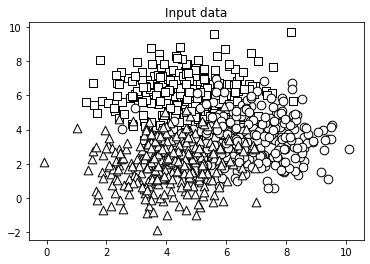

In [25]:
    # Visualize input data
    plt.figure()
    plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='s')
    plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='o')
    plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='^')
    plt.title('Input data')

In [26]:
    # Split data into training and testing datasets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [27]:
    # Ensemble Learning classifier
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

In [28]:
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)

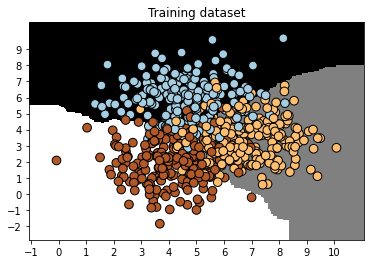

In [29]:
    classifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')

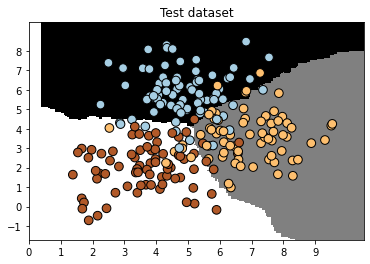

In [30]:
    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [31]:
    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#"*40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
    print("#"*40 + "\n")

    print("#"*40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.89      0.83      0.86       221
     Class-1       0.82      0.84      0.83       230
     Class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.84      0.84      0.84        70
     Class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

In [32]:
    # Compute confidence
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

In [33]:
    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class) 


Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


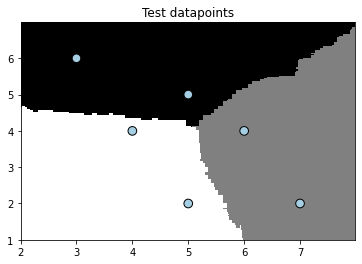

In [34]:
    # Visualize the datapoints
    visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 
            'Test datapoints')

    plt.show()